In [13]:
#using Pkg
#Pkg.activate(".")
#Pkg.instantiate() #only once

In [1]:
#imports
using Plots


In [8]:
# settings
z=-10.0:0.1:0.0

#model prior
sal_0 = 10.0
d_sal_0 = 1.0
sal_1 = 5.0
d_sal_1 = 0.5
sal_1_z = -7.0
d_sal_1_z = 0.5
sal_1_z_scale = 2.0
d_sal_1_z_scale = 0.5
model_μ=[sal_0, sal_1, sal_1_z,sal_1_z_scale]
model_σ=[d_sal_0, d_sal_1, d_sal_1_z,d_sal_1_z_scale]

#measurement
obs_μ = [11.0, 6.0, -6.5,2.0]
obs_z=[-7.0, -4.0, -2.0]
obs_noise=[0.5, 0.5, 0.5]

@show model_μ
@show model_σ
@show obs_μ
@show obs_z

nothing

model_μ = [10.0, 5.0, -7.0, 2.0]
model_σ = [1.0, 0.5, 0.5, 0.5]
obs_μ = [11.0, 6.0, -6.5, 2.0]
obs_z = [-7.0, -4.0, -2.0]


In [9]:
function σ(x)
    return @. 1.0/(1.0 + exp(-x))
end 

function profile(z, sal_pars)
    sal_0, sal_1, sal_1_z, sal_1_z_scale = sal_pars
    sal = @. sal_0 + (sal_1 * σ(sal_1_z_scale*(z - sal_1_z)))
    return sal
end

profile (generic function with 1 method)

In [10]:
# generate data

sal_mod = profile(z, model_μ)

#sal_obs = profile(obs_z, obs_μ)+randn(3).*obs_noise
sal_obs = profile(obs_z, obs_μ)

@show sal_mod
@show sal_obs
nothing

sal_mod = [10.012363115783174, 10.015092081623543, 10.01842119949718, 10.022481365804706, 10.027431494497252, 10.033464254621425, 10.0408128557658, 10.049759009334522, 10.060642174921371, 10.073870158466365, 10.089931049810458, 10.109406354680653, 10.13298496788433, 10.161477323492253, 10.195828613983823, 10.237129365887833, 10.286620879494343, 10.345692101716734, 10.41586348246961, 10.498752445598427, 10.596014610110588, 10.70925532450244, 10.839908074330378, 10.989080557207092, 11.15737608250491, 11.344707106849976, 11.550127594361937, 11.771718468871022, 12.006561699437741, 12.25083001343761, 12.5, 12.74916998656239, 12.993438300562259, 13.228281531128978, 13.449872405638061, 13.655292893150026, 13.842623917495088, 14.010919442792908, 14.160091925669622, 14.29074467549756, 14.403985389889414, 14.501247554401573, 14.584136517530387, 14.654307898283268, 14.713379120505657, 14.762870634112167, 14.80417138601618, 14.838522676507747, 14.86701503211567, 14.890593645319347, 14.910068950189

In [23]:
# plot

plot(sal_mod, z, label="modeled salinity", xlabel="modeled salinity", ylabel="depth", title="salinity profile", lw=2)
scatter!(sal_obs, obs_z, label="observed salinity", lw=2) #add red dots
xlabel!("salinity")
ylabel!("depth")
title!("salinity profile")

#savefig("salinity_profile.png")


"/home/verlaan/src_nobackup/julia_ml_tests.jl.git/salinity_profile.png"

In [19]:
# generate ensemble
n_ens = 40
sal_ens = zeros(length(z), n_ens)
for i in 1:n_ens
    sal_ens[:,i] = profile(z, model_μ .+randn(4).*model_σ)
end

@show sal_ens

sal_ens = [10.130287057282981 10.185177307648582 9.9056585797423 10.092513209826365 11.637092224994497 9.097489884480146 10.279099425616629 11.034435207428102 10.538878659957089 9.939228785038058 10.397269428199916 11.587623356009813 11.360042255892681 9.953441602345915 9.153862256152879 9.072958272435647 10.23679595840092 10.861682869453277 8.980057902479045 10.756464997232888 9.766032101404885 11.114779895251647 9.163770074913328 9.175194462725994 8.928131111651021 10.85805286390794 11.11449919216494 9.93295950420994 9.82101744173722 9.189697210633065 9.338945921767447 10.158161173839172 10.784910723015736 9.630555530808195 10.528461453248326 10.088687596610706 9.011174897179275 8.202113256968516 10.520589869963839 11.060268170287026; 10.137534462936562 10.206347586607714 9.914733204807181 10.093149764147942 11.638917867816183 9.102216921508655 10.280103156631712 11.041152242814732 10.540179389775535 9.967992728698183 10.397584036986144 11.589968269082874 11.376554004191515 9.9573735

101×40 Matrix{Float64}:
 10.1303  10.1852   9.90566  10.0925  11.6371  …   8.20211  10.5206  11.0603
 10.1375  10.2063   9.91473  10.0931  11.6389      8.20249  10.5231  11.0893
 10.146   10.2296   9.92573  10.094   11.6412      8.20298  10.526   11.1212
 10.1559  10.2551   9.93904  10.0951  11.6442      8.2036   10.5296  11.1561
 10.1674  10.283    9.95515  10.0966  11.648       8.2044   10.5338  11.1944
 10.1809  10.3136   9.97461  10.0987  11.6528  …   8.20544  10.5389  11.2362
 10.1966  10.3471   9.99809  10.1014  11.659       8.20676  10.5449  11.2818
 10.2148  10.3836  10.0264   10.1049  11.6668      8.20847  10.5521  11.3315
 10.236   10.4235  10.0604   10.1097  11.6768      8.21067  10.5607  11.3854
 10.2606  10.4668  10.1011   10.1161  11.6895      8.21349  10.5709  11.4438
  ⋮                                            ⋱                     
 14.4725  15.1628  15.2963   15.194   16.0963     13.8095   14.6838  15.4338
 14.4726  15.1638  15.2963   15.194   16.0963     13.8095  

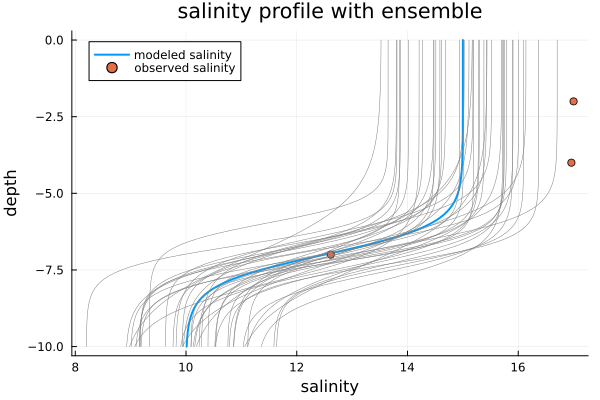

In [25]:
# plot

plot(sal_mod, z, label="modeled salinity", xlabel="modeled salinity", ylabel="depth", title="salinity profile", lw=2)
scatter!(sal_obs, obs_z, label="observed salinity", lw=2) #add red dots
plot!(sal_ens, z, label=false, lw=0.5,lc=:grey)
xlabel!("salinity")
ylabel!("depth")
title!("salinity profile with ensemble")

#savefig("salinity_profile_ens.png")
